# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Инструкция по выполнению проекта**

**1. Загрузка и подготовка данных**


**2. Обучение и проверка модели для каждого региона**

1. **Разделение данных**
   - Разделите данные на обучающую и валидационную выборки в соотношении 75:25.

2. **Обучение модели**
   - Обучите модель и выполните предсказания на валидационной выборке.

3. **Сохранение результатов**
   - Сохраните предсказанные значения и правильные ответы на валидационных данных.

4. **Анализ результатов**
   - Выведите на экран средний запас предсказанных ресурсов и показатель ошибки (RMSE).

5. **Оценка результатов**
   - Проведите анализ полученных результатов.

**3. Подготовка к расчету прибыли**

**4. Сохранение ключевых значений**

1. **Переменные для расчетов**
   - Все важные параметры сохраните в отдельные переменные.

2. **Расчет минимального объема сырья**
   - Определите необходимый объем сырья для безубыточного бурения новых скважин. Сравните этот объем с прогнозными данными по каждому региону.

3. **Выводы по подготовке расчета прибыли**
   - Сделайте выводы по результатам этапа подготовки к расчетам прибыли.

**5. Функция для расчета прибыли**

1. **Выбор скважин**
   - Отберите скважины с наибольшими показателями прогнозируемых объемов сырья.

2. **Сумма целевого объема сырья**
   - Суммируйте объемы сырья, соответствующие сделанным прогнозам.

3. **Рассчет прибыли**
   - Выполните расчет прибыли для суммарного объема сырья.

**6. Оценка рисков и прибыли по регионам**

1. **Bootstrap-анализ**
   - Используйте метод бутстрэпа с 1000 выборками для оценки распределения прибыли.

2. **Статистические показатели**
   - Определите среднюю прибыль, 95% доверительный интервал и вероятность убытков. Убытком считается отрицательное значение прибыли.

3. **Рекомендации**
   - Сделайте вывод о наиболее перспективном регионе для бурения скважин и обоснуйте свой выбор.

**Описание данных**

Данные геологоразведки трех регионов содержатся в следующих файлах:

- `/datasets/geo_data_0.csv`
- `/datasets/geo_data_1.csv`
- `/datasets/geo_data_2.csv`

В этих файлах представлены следующие столбцы:

- `id` — уникальный идентификатор скважины;
- `f0`, `f1`, `f2` — три значимых признака точек (их конкретное значение не важно для данной задачи);
- `product` — объем запасов в скважине (в тысячах баррелей).

**Условия задачи**

1. Для обучения модели используется только линейная регрессия, так как другие методы дают менее точные прогнозы.
2. При разведке региона исследуется 500 точек, из которых с помощью машинного обучения выбираются 200 лучших для дальнейшей разработки.
3. Бюджет на разработку скважин в одном регионе ограничен суммой в 10 миллиардов рублей.
4. Один баррель сырья при текущих ценах приносит доход в размере 450 рублей. Таким образом, каждая единица продукта (тысяча баррелей) дает доход в 450 тысяч рублей.
5. После анализа рисков остаются только те регионы, где вероятность убытков составляет менее 2.5%.
6. Из оставшихся регионов выбирается тот, который имеет наибольшую среднюю прибыль.
**Данные являются синтетическими, поэтому конкретные детали контрактов и характеристик месторождений не раскрываются.**

In [1]:
from IPython.core.display import display, HTML
CONTAINER_WIDTH = '90%'

css_style = f"""
<style>
.container {{
    width: {CONTAINER_WIDTH} !important;
}}
</style>
"""
display(HTML(css_style))

In [2]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import warnings

warnings.filterwarnings('ignore')

## Шаг 1. Загрузка и подготовка данных

In [3]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_0.head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [4]:
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_1.head(10)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [5]:
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
geo_data_2.head(10)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


In [6]:
with pd.option_context('display.max_columns', None):
    display(geo_data_0.info())
    display(geo_data_0.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [7]:
missing_values_count = geo_data_0.isna().sum()
duplicate_rows_count = geo_data_0.duplicated().sum()
print(f"Количество пропущенных значений: {missing_values_count}")
print(f"Количество дубликатов: {duplicate_rows_count}")

Количество пропущенных значений: id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Количество дубликатов: 0


In [8]:
duplicate_id = geo_data_0[geo_data_0.duplicated(['id'])]
id_duplicate = duplicate_id['id'].unique()
geo_data_0.loc[geo_data_0['id'].isin(id_duplicate)].sort_values(by = 'id', ascending = False)

,id,f0,f1,f2,product
90815,fiKDv,0.049883,0.841313,6.394613,137.346586
16633,fiKDv,0.157341,1.028359,5.585586,95.817889
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
1364,bxg6G,0.411645,0.856830,-3.653440,73.604260
97785,bsk9y,0.378429,0.005837,0.160827,160.637302
89582,bsk9y,0.398908,-0.400253,10.122376,163.433078
92341,TtcGQ,0.110711,1.022689,0.911381,101.318008
60140,TtcGQ,0.569276,-0.104876,6.440215,85.350186
21426,Tdehs,0.829407,0.298807,-0.049563,96.035308
75715,Tdehs,0.112079,0.430296,3.218993,60.964018


Файл с данными геологоразведки `/datasets/geo_data_0.csv` успешно загружен. В нем отсутствуют пропуски и дубликаты строк. Однако обнаружены повторяющиеся значения в колонке `id`, которая должна содержать уникальные идентификаторы скважин. Остальные данные по таким скважинам различаются, что указывает на информацию по разным объектам. Чтобы устранить проблему, будем добавлять суффиксы `_1` и `_2` к дублирующимся идентификаторам.

In [9]:
id_duplicate_index = geo_data_0.loc[geo_data_0['id'].isin(id_duplicate)].sort_values(by = 'id', ascending = False).index
print(id_duplicate_index)

honest = geo_data_0[geo_data_0.duplicated(['id'])].sort_values(by = 'id', ascending = False).index
print(honest)

odd = geo_data_0.loc[geo_data_0['id'].isin(id_duplicate)].drop(index=honest).sort_values(by = 'id', ascending = False).index
print(odd)

Int64Index([90815, 16633, 41724,  1364, 97785, 89582, 92341, 60140, 21426,
            75715, 63593,  1949,  7530,   931, 42529, 69163, 51970,  3389,
            64022, 66136],
           dtype='int64')
Int64Index([90815, 41724, 97785, 92341, 75715, 63593, 7530, 69163, 51970,
            66136],
           dtype='int64')
Int64Index([16633, 1364, 89582, 60140, 21426, 1949, 931, 42529, 3389, 64022], dtype='int64')


In [10]:
honest_df = geo_data_0.loc[honest]
display(honest_df.sort_values(by = 'id', ascending = False))
odd_df = geo_data_0.loc[odd]
display(odd_df.sort_values(by = 'id', ascending = False))
geo_data_0 = geo_data_0.drop(index=id_duplicate_index)
geo_data_0.info()

,id,f0,f1,f2,product
90815,fiKDv,0.049883,0.841313,6.394613,137.346586
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
97785,bsk9y,0.378429,0.005837,0.160827,160.637302
92341,TtcGQ,0.110711,1.022689,0.911381,101.318008
75715,Tdehs,0.112079,0.430296,3.218993,60.964018
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
66136,74z30,1.084962,-0.312358,6.990771,127.643327


,id,f0,f1,f2,product
16633,fiKDv,0.157341,1.028359,5.585586,95.817889
1364,bxg6G,0.411645,0.856830,-3.653440,73.604260
89582,bsk9y,0.398908,-0.400253,10.122376,163.433078
60140,TtcGQ,0.569276,-0.104876,6.440215,85.350186
21426,Tdehs,0.829407,0.298807,-0.049563,96.035308
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502
931,HZww2,0.755284,0.368511,1.863211,30.681774
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
64022,74z30,0.741456,0.459229,5.153109,140.771492


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99980 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99980 non-null  object 
 1   f0       99980 non-null  float64
 2   f1       99980 non-null  float64
 3   f2       99980 non-null  float64
 4   product  99980 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


In [11]:
honest_df['id'] = honest_df['id'].astype(str).apply(lambda col: col + '_1')
odd_df['id'] = odd_df['id'].astype(str).apply(lambda col: col + '_2')

display(honest_df.sort_values(by='id', ascending=False))
display(odd_df.sort_values(by='id', ascending=False))

,id,f0,f1,f2,product
90815,fiKDv_1,0.049883,0.841313,6.394613,137.346586
41724,bxg6G_1,-0.823752,0.546319,3.630479,93.007798
97785,bsk9y_1,0.378429,0.005837,0.160827,160.637302
92341,TtcGQ_1,0.110711,1.022689,0.911381,101.318008
75715,Tdehs_1,0.112079,0.430296,3.218993,60.964018
63593,QcMuo_1,0.635635,-0.473422,0.862670,64.578675
7530,HZww2_1,1.061194,-0.373969,10.430210,158.828695
69163,AGS9W_1,-0.933795,0.116194,-3.655896,19.230453
51970,A5aEY_1,-0.180335,0.935548,-2.094773,33.020205
66136,74z30_1,1.084962,-0.312358,6.990771,127.643327


,id,f0,f1,f2,product
16633,fiKDv_2,0.157341,1.028359,5.585586,95.817889
1364,bxg6G_2,0.411645,0.856830,-3.653440,73.604260
89582,bsk9y_2,0.398908,-0.400253,10.122376,163.433078
60140,TtcGQ_2,0.569276,-0.104876,6.440215,85.350186
21426,Tdehs_2,0.829407,0.298807,-0.049563,96.035308
1949,QcMuo_2,0.506563,-0.323775,-2.215583,75.496502
931,HZww2_2,0.755284,0.368511,1.863211,30.681774
42529,AGS9W_2,1.454747,-0.479651,0.683380,126.370504
3389,A5aEY_2,-0.039949,0.156872,0.209861,89.249364
64022,74z30_2,0.741456,0.459229,5.153109,140.771492


In [12]:
geo_data_0 = pd.concat([geo_data_0, honest_df, odd_df], ignore_index=True)

with pd.option_context('display.max_columns', None):
    print("Информация о датафрейме:")
    display(geo_data_0.info())
    print("\nКоличество дубликатов по столбцу 'id':")
    print(geo_data_0.duplicated(['id']).sum())

Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Количество дубликатов по столбцу 'id':
0


Обработка данных из файла `/datasets/geo_data_0.csv` завершена. Повторяющихся значений в колонке `id`, содержащей уникальные идентификаторы скважин, больше нет.

In [13]:
with pd.option_context('display.max_columns', None):
    display(geo_data_1.info())
    display(geo_data_1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [14]:
missing_values_count = geo_data_1.isna().sum()
duplicate_rows_count = geo_data_1.duplicated().sum()
print(f"Количество пропущенных значений: {missing_values_count}")
print(f"Количество дубликатов: {duplicate_rows_count}")

Количество пропущенных значений: id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Количество дубликатов: 0


In [15]:
duplicate_id = geo_data_1[geo_data_1.duplicated(['id'])]
id_duplicate = duplicate_id['id'].unique()
geo_data_1.loc[geo_data_1['id'].isin(id_duplicate)].sort_values(by = 'id', ascending = False)

,id,f0,f1,f2,product
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


Файл с данными геологоразведки `/datasets/geo_data_1.csv` успешно загружен. В нем отсутствуют пропуски и дубликаты строк. Однако обнаружены повторяющиеся значения в колонке `id`, которая должна содержать уникальные идентификаторы скважин. Остальные данные по таким скважинам различаются, что указывает на информацию по разным объектам. Чтобы устранить проблему, будем добавлять суффиксы `_1` и `_2` к дублирующимся идентификаторам.

In [16]:
id_duplicate_index = geo_data_1.loc[geo_data_1['id'].isin(id_duplicate)].sort_values(by = 'id', ascending = False).index
print(id_duplicate_index)

honest = geo_data_1[geo_data_1.duplicated(['id'])].sort_values(by = 'id', ascending = False).index
print(honest)

odd = geo_data_1.loc[geo_data_1['id'].isin(id_duplicate)].drop(index=honest).sort_values(by = 'id', ascending = False).index
print(odd)

Int64Index([47591, 82873, 2721, 82178, 1305, 41906, 5849, 84461], dtype='int64')
Int64Index([82873, 82178, 41906, 84461], dtype='int64')
Int64Index([47591, 2721, 1305, 5849], dtype='int64')


In [17]:
honest_df = geo_data_1.loc[honest]
display(honest_df.sort_values(by = 'id', ascending = False))
odd_df = geo_data_1.loc[odd]
display(odd_df.sort_values(by = 'id', ascending = False))
geo_data_1 = geo_data_1.drop(index=id_duplicate_index)
geo_data_1.info()

,id,f0,f1,f2,product
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


,id,f0,f1,f2,product
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99992 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99992 non-null  object 
 1   f0       99992 non-null  float64
 2   f1       99992 non-null  float64
 3   f2       99992 non-null  float64
 4   product  99992 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


In [18]:
honest_df['id'] = honest_df['id'].astype(str).apply(lambda col: col + '_1')
honest_df = honest_df.sort_values(by='id', ascending=False)

odd_df['id'] = odd_df['id'].astype(str).apply(lambda col: col + '_2')
odd_df = odd_df.sort_values(by='id', ascending=False)

display(honest_df)
display(odd_df)

,id,f0,f1,f2,product
82873,wt4Uk_1,10.259972,-9.376355,4.994297,134.766305
82178,bfPNe_1,-6.202799,-4.820045,2.995107,84.038886
41906,LHZR0_1,-8.989672,-4.286607,2.009139,57.085625
84461,5ltQ6_1,18.213839,2.191999,3.993869,107.813044


,id,f0,f1,f2,product
47591,wt4Uk_2,-9.091098,-8.109279,-0.002314,3.179103
2721,bfPNe_2,-9.494442,-5.463692,4.006042,110.992147
1305,LHZR0_2,11.170835,-1.945066,3.002872,80.859783
5849,5ltQ6_2,-3.435401,-12.296043,1.999796,57.085625


In [19]:
geo_data_0 = pd.concat([geo_data_1, honest_df, odd_df], ignore_index=True)

with pd.option_context('display.max_columns', None):
    print("Информация о датафрейме:")
    display(geo_data_1.info())
    print("\nКоличество дубликатов по столбцу 'id':")
    print(geo_data_1.duplicated(['id']).sum())

Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99992 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99992 non-null  object 
 1   f0       99992 non-null  float64
 2   f1       99992 non-null  float64
 3   f2       99992 non-null  float64
 4   product  99992 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


None


Количество дубликатов по столбцу 'id':
0


Обработка данных из файла `/datasets/geo_data_1.csv` завершена. Повторяющихся значений в колонке `id`, содержащей уникальные идентификаторы скважин, больше нет.

In [20]:
with pd.option_context('display.max_columns', None):
    display(geo_data_2.info())
    display(geo_data_2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [21]:
missing_values_count = geo_data_2.isna().sum()
duplicate_rows_count = geo_data_2.duplicated().sum()
print(f"Количество пропущенных значений: {missing_values_count}")
print(f"Количество дубликатов: {duplicate_rows_count}")

Количество пропущенных значений: id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Количество дубликатов: 0


In [22]:
duplicate_id = geo_data_2[geo_data_2.duplicated(['id'])]
id_duplicate = duplicate_id['id'].unique()
geo_data_2.loc[geo_data_2['id'].isin(id_duplicate)].sort_values(by = 'id', ascending = False)

,id,f0,f1,f2,product
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802


Файл с данными геологоразведки `/datasets/geo_data_2.csv` успешно загружен. В нем отсутствуют пропуски и полные дубликаты строк. Однако найдены повторяющиеся значения в колонке `id`, которая должна содержать уникальные идентификаторы скважин. Остальные данные по таким скважинам отличаются друг от друга, что говорит о том, что это разные объекты. Для устранения дублирования идентификаторов будем добавлять к ним суффиксы `_1` и `_2`.

In [23]:
id_duplicate_index = geo_data_2.loc[geo_data_2['id'].isin(id_duplicate)].sort_values(by = 'id', ascending = False).index
print(id_duplicate_index)

honest = geo_data_0[geo_data_2.duplicated(['id'])].sort_values(by = 'id', ascending = False).index
print(honest)

odd = geo_data_2.loc[geo_data_2['id'].isin(id_duplicate)].drop(index=honest).sort_values(by = 'id', ascending = False).index
print(odd)

Int64Index([28039, 43233, 44378, 95090, 11449, 49564, 45404, 55967], dtype='int64')
Int64Index([95090, 49564, 43233, 55967], dtype='int64')
Int64Index([28039, 44378, 11449, 45404], dtype='int64')


In [24]:
honest_df = geo_data_2.loc[honest]
display(honest_df.sort_values(by = 'id', ascending = False))
odd_df = geo_data_2.loc[odd]
display(odd_df.sort_values(by = 'id', ascending = False))
geo_data_2 = geo_data_2.drop(index=id_duplicate_index)
geo_data_2.info()

,id,f0,f1,f2,product
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
55967,KUPhW,1.211150,3.176408,5.543540,132.831802


,id,f0,f1,f2,product
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99992 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99992 non-null  object 
 1   f0       99992 non-null  float64
 2   f1       99992 non-null  float64
 3   f2       99992 non-null  float64
 4   product  99992 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


In [25]:
honest_df['id'] = honest_df['id'].astype(str).apply(lambda col: col + '_1')
odd_df['id'] = odd_df['id'].astype(str).apply(lambda col: col + '_2')

display(honest_df.sort_values(by='id', ascending=False))
display(odd_df.sort_values(by='id', ascending=False))

,id,f0,f1,f2,product
43233,xCHr8_1,-0.847066,2.101796,5.597130,184.388641
95090,Vcm5J_1,2.587702,1.986875,2.482245,92.327572
49564,VF7Jo_1,-0.883115,0.560537,0.723601,136.233420
55967,KUPhW_1,1.211150,3.176408,5.543540,132.831802


,id,f0,f1,f2,product
28039,xCHr8_2,1.633027,0.368135,-2.378367,6.120525
44378,Vcm5J_2,-1.229484,-2.439204,1.222909,137.968290
11449,VF7Jo_2,2.122656,-0.858275,5.746001,181.716817
45404,KUPhW_2,0.231846,-1.698941,4.990775,11.716299


In [26]:
geo_data_0 = pd.concat([geo_data_2, honest_df, odd_df], ignore_index=True)

with pd.option_context('display.max_columns', None):
    print("Информация о датафрейме:")
    display(geo_data_2.info())
    print("\nКоличество дубликатов по столбцу 'id':")
    print(geo_data_2.duplicated(['id']).sum())

Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99992 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99992 non-null  object 
 1   f0       99992 non-null  float64
 2   f1       99992 non-null  float64
 3   f2       99992 non-null  float64
 4   product  99992 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


None


Количество дубликатов по столбцу 'id':
0


Обработка данных из файла `/datasets/geo_data_2.csv` завершена. Повторяющихся значений в колонке `id`, содержащей уникальные идентификаторы скважин, больше нет.

Создадим box-plot и проведем анализ полученных результатов.

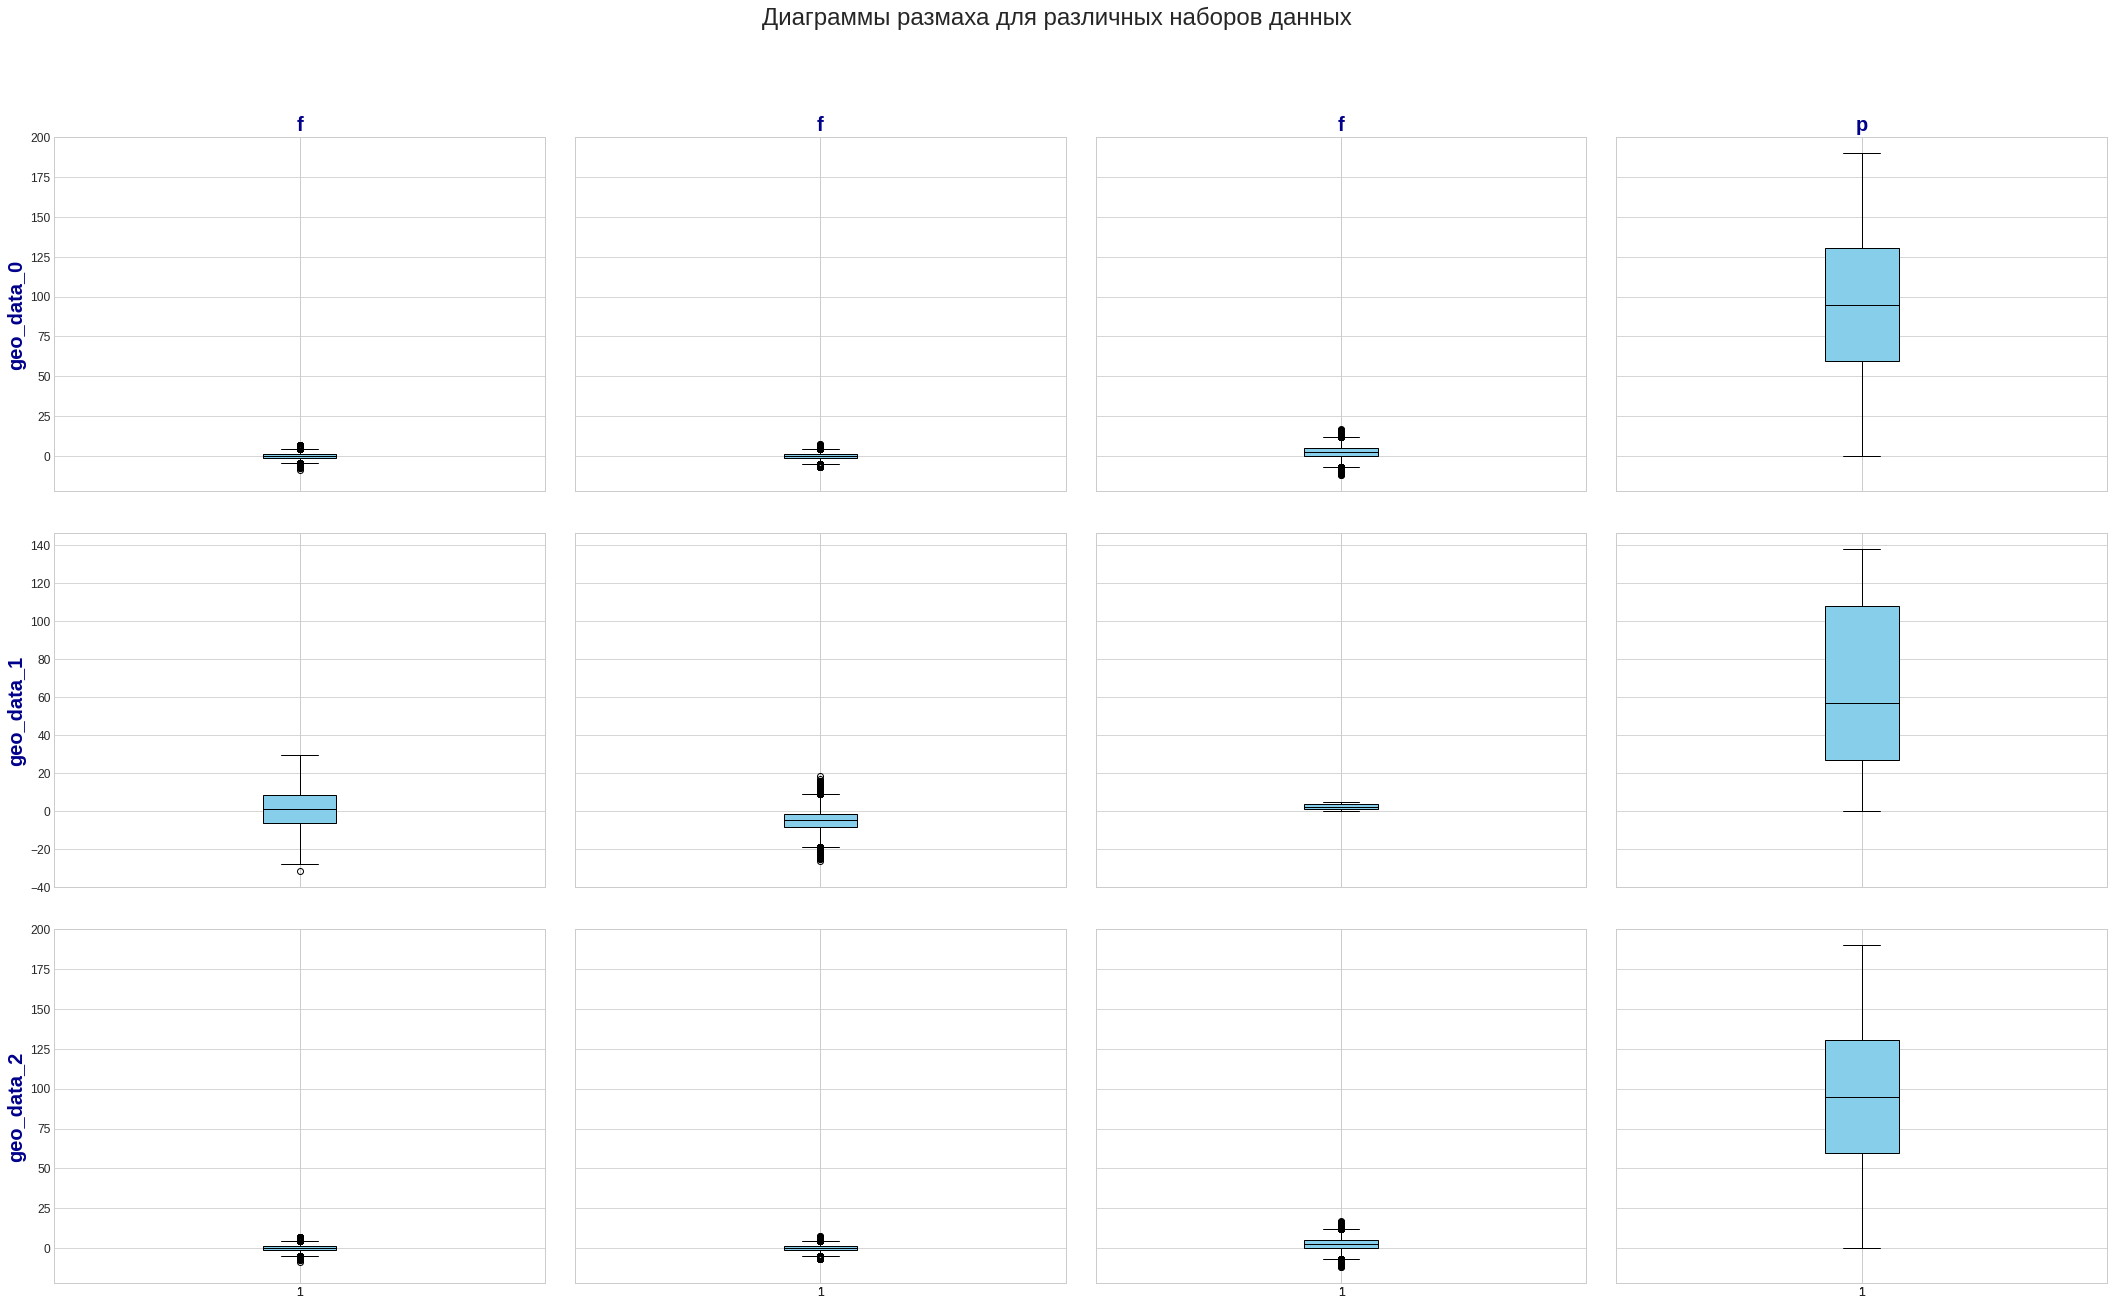

In [27]:
plt.style.use('seaborn-whitegrid')

fig, axes = plt.subplots(3, 4, figsize=(30, 18), sharex='col', sharey='row')

all_data = ['geo_data_0', 'geo_data_1', 'geo_data_2']
num_column = geo_data_0.columns[1:]
num_columns = zip(geo_data_0.columns[1:], range(4))
all_data_rows = zip([geo_data_0, geo_data_1, geo_data_2], range(3))

for column in list(itertools.product(all_data_rows, num_columns)):
    axes[column[0][1]][column[1][1]].boxplot(
        column[0][0][column[1][0]],
        patch_artist=True,
        boxprops=dict(facecolor="skyblue"),
        medianprops=dict(color='black'),
        whiskerprops=dict(color='black'),
        capprops=dict(color='black')
    )
    axes[column[0][1]][column[1][1]].tick_params(axis='both', which='major', labelsize=12)
    axes[column[0][1]][column[1][1]].yaxis.set_major_locator(MaxNLocator(integer=True))

for row in range(3):
    axes[row][0].set_ylabel(all_data[row], fontsize=20, fontweight="bold", color='darkblue')

for column in range(4):
    axes[0][column].set_title(num_column[column][0], fontsize=20, fontweight="bold", color='darkblue')

plt.suptitle('Диаграммы размаха для различных наборов данных', fontsize=24, y=1.02)
plt.tight_layout(pad=3.0)
plt.show()

На шести графиках заметны выбросы ниже нижнего квартиля и выше верхнего квартиля для следующих комбинаций: `geo_data_0, f2`, `geo_data_1, f0`, `geo_data_1, f1`, `geo_data_2, f0`, `geo_data_2, f1` и `geo_data_2, f2`. Необходимо рассчитать процент таких выбросов и, возможно, удалить их.

In [28]:
emissions_data = [(geo_data_0,'f2', 'geo_data_0'), (geo_data_1,'f0', 'geo_data_1'), 
                  (geo_data_1,'f1', 'geo_data_1'), (geo_data_2,'f0', 'geo_data_2'), (geo_data_2,'f1', 'geo_data_2'), (geo_data_2,'f2', 'geo_data_2')]

In [29]:
def percent_del_index(data, column, name):
    dfs = name
    q25=np.array(data[column].quantile(0.25))
    
    q75=np.array(data[column].quantile(0.75))
    first_part=q25-1.5*(q75-q25)
    second_part=q75+1.5*(q75-q25)
    data_del_index = []
    for index_value, value in zip(data[column].index,data[column]):
        if second_part <= value or value <= first_part:
            data_del_index.append(index_value)
    percent_del_index = len(data_del_index)*100/len(data)
    print('\u001b[38;5;19m','Процент строк в файле', dfs, 'и признаке', column, 'выбранных для удаления:', percent_del_index,'%', '\u001b[0m')
    return percent_del_index

In [30]:
for data, column, name in emissions_data:
    percent_del_index(data,column,name)

 Процент строк в файле geo_data_0 и признаке f2 выбранных для удаления: 0.584 % 
 Процент строк в файле geo_data_1 и признаке f0 выбранных для удаления: 0.001000080006400512 % 
 Процент строк в файле geo_data_1 и признаке f1 выбранных для удаления: 0.6360508840707256 % 
 Процент строк в файле geo_data_2 и признаке f0 выбранных для удаления: 0.7330586446915753 % 
 Процент строк в файле geo_data_2 и признаке f1 выбранных для удаления: 0.6840547243779502 % 
 Процент строк в файле geo_data_2 и признаке f2 выбранных для удаления: 0.584046723737899 % 


Заметен небольшой процент выбросов, выходящих за пределы верхнего и нижнего квартилей. Создадим фукцию для их удаления.

In [31]:
def data_del_index(data,column, name):
    q25=np.array(data[column].quantile(0.25))   
    q75=np.array(data[column].quantile(0.75))
    first_part=q25-1.5*(q75-q25)
    second_part=q75+1.5*(q75-q25)
    data_del_index = []
    for index_value, value in zip(data[column].index,data[column]):
        if second_part <= value or value <= first_part:
            data_del_index.append(index_value)
    return data_del_index

In [32]:
for data, column, name in emissions_data:
    indexes = data_del_index(data,column,name)
    data.drop(indexes,axis = 0,inplace = True)

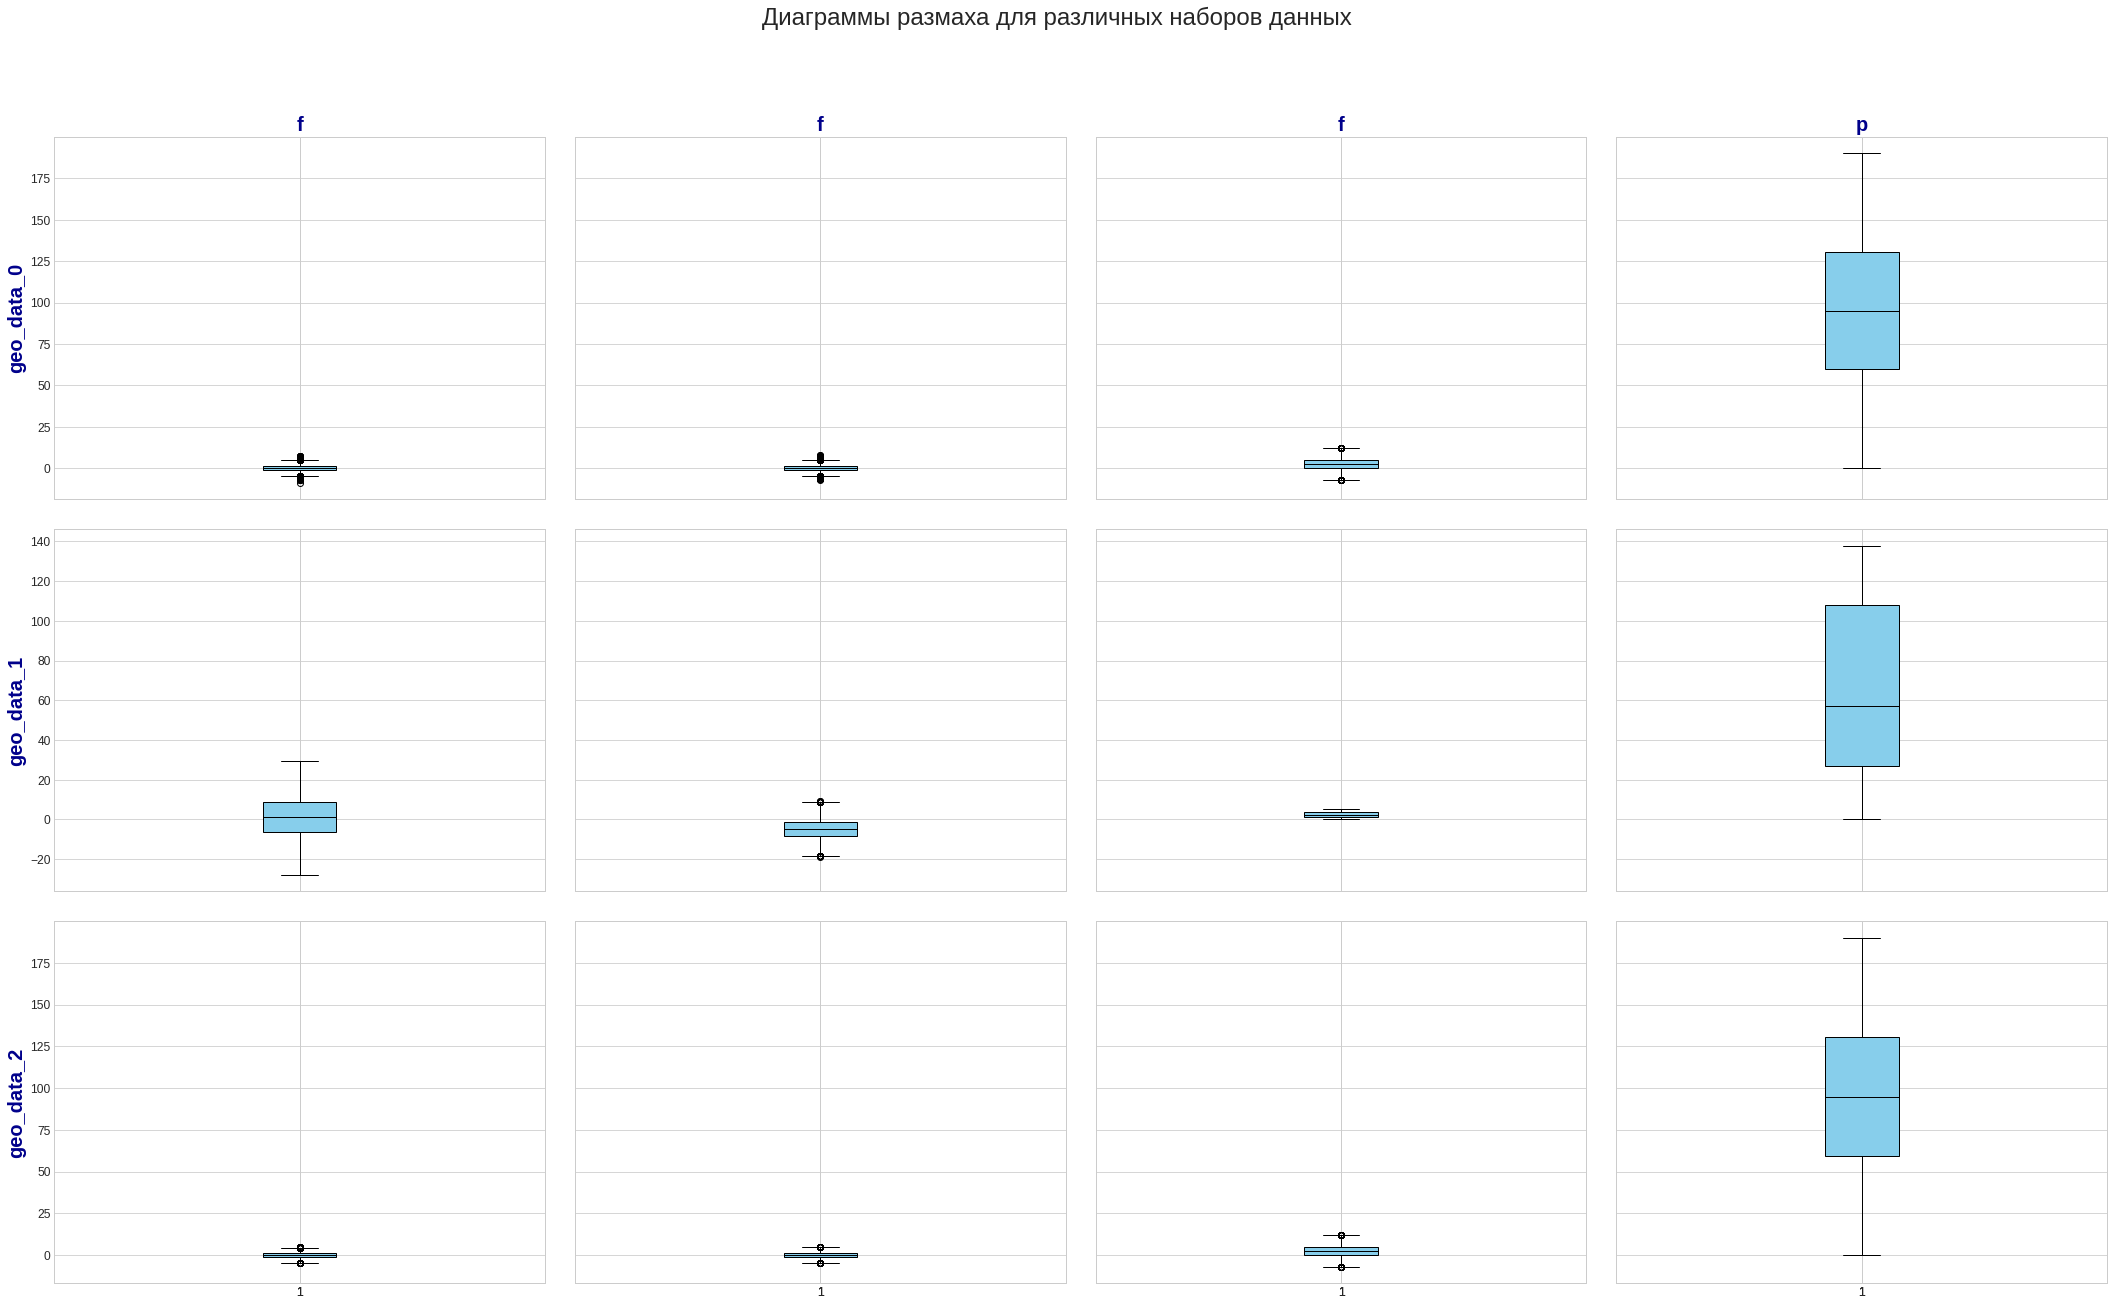

In [33]:
plt.style.use('seaborn-whitegrid')

fig, axes = plt.subplots(3, 4, figsize=(30, 18), sharex='col', sharey='row')

all_data = ['geo_data_0', 'geo_data_1', 'geo_data_2']
num_column = geo_data_0.columns[1:]
num_columns = zip(geo_data_0.columns[1:], range(4))
all_data_rows = zip([geo_data_0, geo_data_1, geo_data_2], range(3))

for column in list(itertools.product(all_data_rows, num_columns)):
    axes[column[0][1]][column[1][1]].boxplot(
        column[0][0][column[1][0]],
        patch_artist=True,
        boxprops=dict(facecolor="skyblue"),
        medianprops=dict(color='black'),
        whiskerprops=dict(color='black'),
        capprops=dict(color='black')
    )
    axes[column[0][1]][column[1][1]].tick_params(axis='both', which='major', labelsize=12)
    axes[column[0][1]][column[1][1]].yaxis.set_major_locator(MaxNLocator(integer=True))

for row in range(3):
    axes[row][0].set_ylabel(all_data[row], fontsize=20, fontweight="bold", color='darkblue')

for column in range(4):
    axes[0][column].set_title(num_column[column][0], fontsize=20, fontweight="bold", color='darkblue')

plt.suptitle('Диаграммы размаха для различных наборов данных', fontsize=24, y=1.02)
plt.tight_layout(pad=3.0)
plt.show()

Визуализация подтвердила, что выбросы удалены.

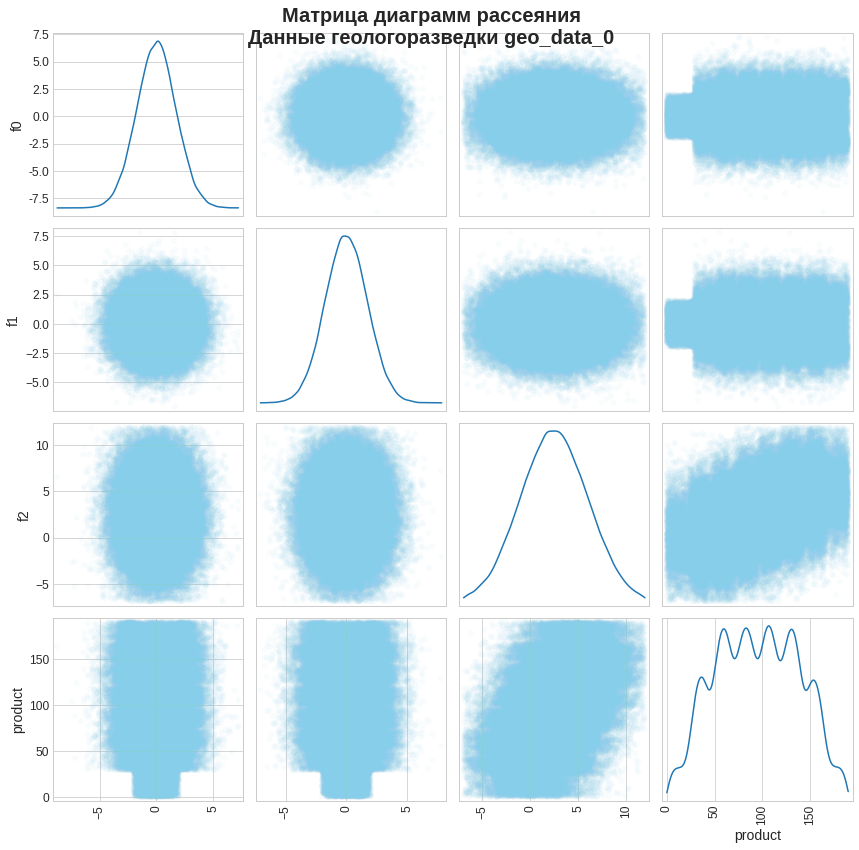

In [34]:
columns_to_plot = geo_data_0.columns[geo_data_0.columns != 'id']
axes = pd.plotting.scatter_matrix(
    geo_data_0[columns_to_plot],
    figsize=(12, 12),
    marker='o',
    c='skyblue',
    alpha=0.05,
    diagonal='kde'
)

for i in range(len(columns_to_plot)):
    for j in range(i):
        if i == j:
            continue
        axes[i, j].xaxis.label.set_visible(False)
        axes[j, i].yaxis.label.set_visible(False)

for ax in axes.flatten():
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    ax.tick_params(axis='both', labelsize=12)

plt.suptitle('Матрица диаграмм рассеяния\nДанные геологоразведки geo_data_0\n', fontsize=20, fontweight="bold")
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

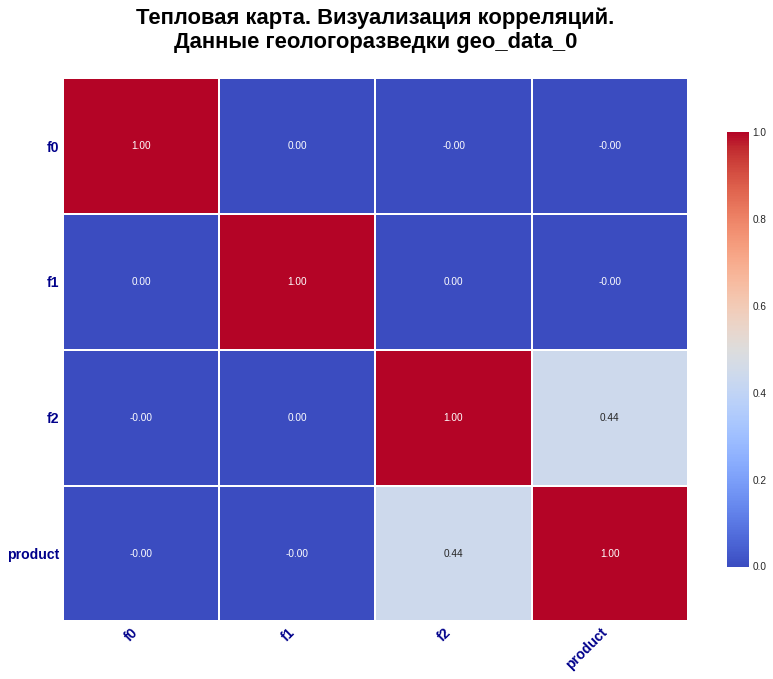

In [35]:
selected_columns = geo_data_0.columns[geo_data_0.columns != 'id']

plt.figure(figsize=(14, 10))
colormap = sns.color_palette("coolwarm", as_cmap=True)

chart = sns.heatmap(
    geo_data_0[selected_columns].corr(),
    annot=True,
    fmt=".2f",
    cmap=colormap,
    linewidths=1,
    linecolor='white',
    cbar_kws={"shrink": .8}
)

plt.title('Тепловая карта. Визуализация корреляций.\nДанные геологоразведки geo_data_0\n', fontsize=22, fontweight="bold", color='black')

chart.set_xticklabels(selected_columns, rotation=45, ha='right', fontsize=14, fontweight="bold", color='darkblue')
chart.set_yticklabels(selected_columns, rotation=0, ha='right', fontsize=14, fontweight="bold", color='darkblue')

plt.show()

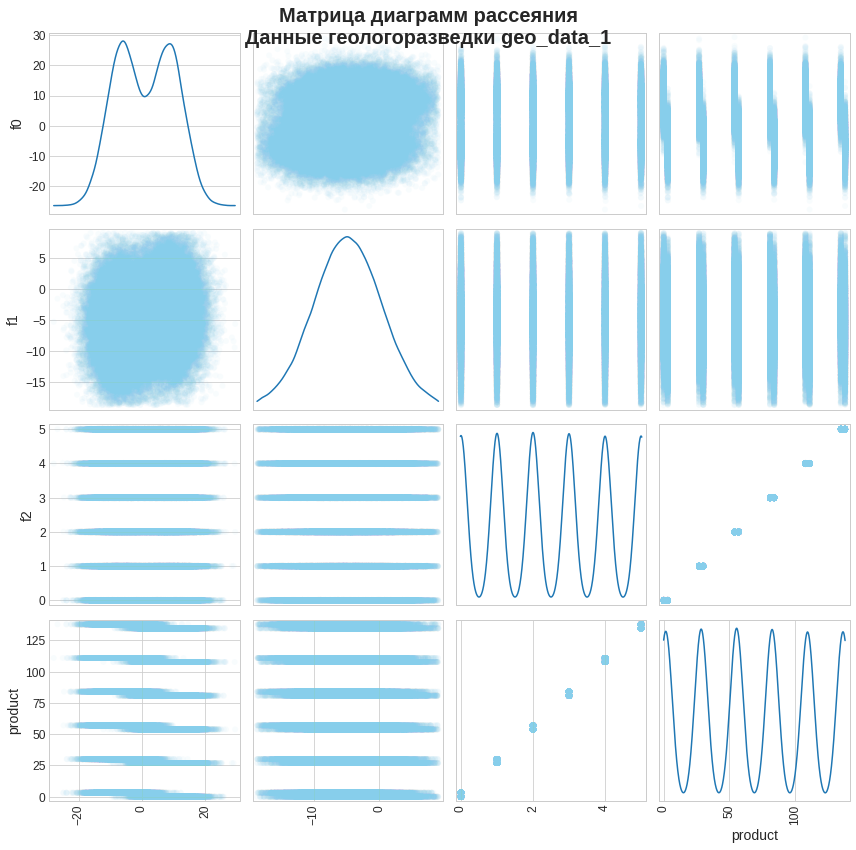

In [36]:
columns_to_plot = geo_data_1.columns[geo_data_1.columns != 'id']
axes = pd.plotting.scatter_matrix(
    geo_data_1[columns_to_plot],
    figsize=(12, 12),
    marker='o',
    c='skyblue',
    alpha=0.05,
    diagonal='kde'
)

for i in range(len(columns_to_plot)):
    for j in range(i):
        if i == j:
            continue
        axes[i, j].xaxis.label.set_visible(False)
        axes[j, i].yaxis.label.set_visible(False)

for ax in axes.flatten():
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    ax.tick_params(axis='both', labelsize=12)

plt.suptitle('Матрица диаграмм рассеяния\nДанные геологоразведки geo_data_1\n', fontsize=20, fontweight="bold")
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

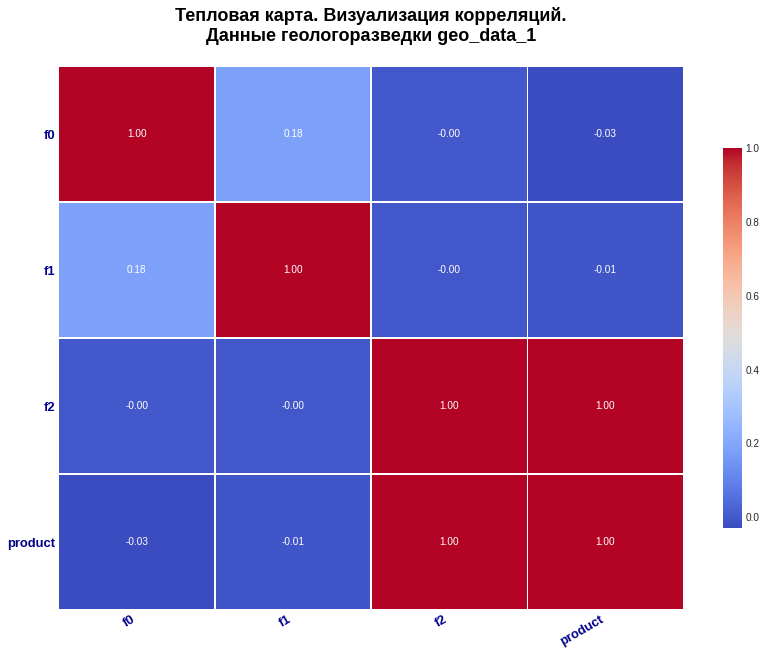

In [37]:
selected_columns = geo_data_1.columns[geo_data_1.columns != 'id']

plt.figure(figsize=(14, 10))
colormap = sns.color_palette("coolwarm", as_cmap=True)

chart = sns.heatmap(
    geo_data_1[selected_columns].corr(),
    annot=True,
    fmt=".2f",
    cmap=colormap,
    linewidths=.5,
    linecolor='white',
    cbar_kws={"shrink": .7}
)

plt.title('Тепловая карта. Визуализация корреляций.\nДанные геологоразведки geo_data_1\n', fontsize=18, fontweight="bold", color='black')

chart.set_xticklabels(selected_columns, rotation=30, ha='right', fontsize=13, fontweight="bold", color='darkblue')
chart.set_yticklabels(selected_columns, rotation=0, ha='right', fontsize=13, fontweight="bold", color='darkblue')

plt.show()

Для первого региона обнаружено, что признак `f2` имеет чрезвычайно высокую корреляцию с целевым признаком, коэффициент корреляции равен 1.

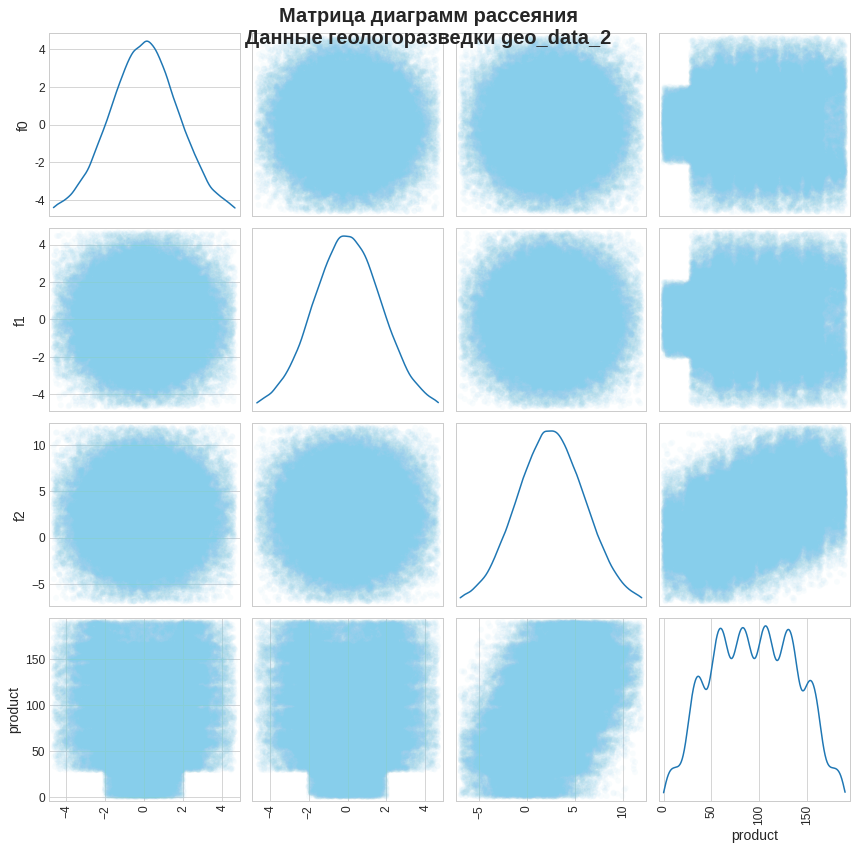

In [38]:
columns_to_plot = geo_data_2.columns[geo_data_2.columns != 'id']
axes = pd.plotting.scatter_matrix(
    geo_data_2[columns_to_plot],
    figsize=(12, 12),
    marker='o',
    c='skyblue',
    alpha=0.05,
    diagonal='kde'
)

for i in range(len(columns_to_plot)):
    for j in range(i):
        if i == j:
            continue
        axes[i, j].xaxis.label.set_visible(False)
        axes[j, i].yaxis.label.set_visible(False)
        
for ax in axes.flatten():
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    ax.tick_params(axis='both', labelsize=12)
    
plt.suptitle('Матрица диаграмм рассеяния\nДанные геологоразведки geo_data_2\n', fontsize=20, fontweight="bold")
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

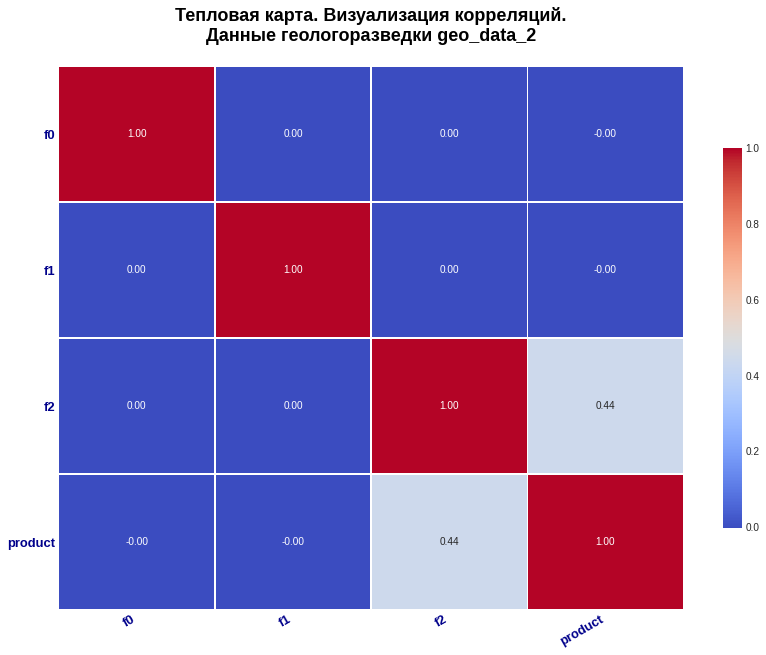

In [39]:
selected_columns = geo_data_2.columns[geo_data_2.columns != 'id']

plt.figure(figsize=(14, 10))

colormap = sns.color_palette("coolwarm", as_cmap=True)

chart = sns.heatmap(
    geo_data_2[selected_columns].corr(),
    annot=True,
    fmt=".2f",
    cmap=colormap,
    linewidths=.5,
    linecolor='white',
    cbar_kws={"shrink": .7}
)

plt.title('Тепловая карта. Визуализация корреляций.\nДанные геологоразведки geo_data_2\n', fontsize=18, fontweight="bold", color='black')

chart.set_xticklabels(selected_columns, rotation=30, ha='right', fontsize=13, fontweight="bold", color='darkblue')
chart.set_yticklabels(selected_columns, rotation=0, ha='right', fontsize=13, fontweight="bold", color='darkblue')

plt.show()

Для улучшения качества работы моделей машинного обучения мы применим метод генерации новых признаков.

In [40]:
geo_data_0['f3'] = geo_data_0['f0'] * geo_data_0['f1']
geo_data_0['f4'] = geo_data_0['f0'] / geo_data_0['f1']
geo_data_0['f5'] = geo_data_0['f0'] * geo_data_0['f0']
geo_data_0['f6'] = geo_data_0['f1'] * geo_data_0['f1']
geo_data_0['f7'] = geo_data_0['f2'] * geo_data_0['f2']
geo_data_0['f8'] = geo_data_0['f0'] + geo_data_0['f1']

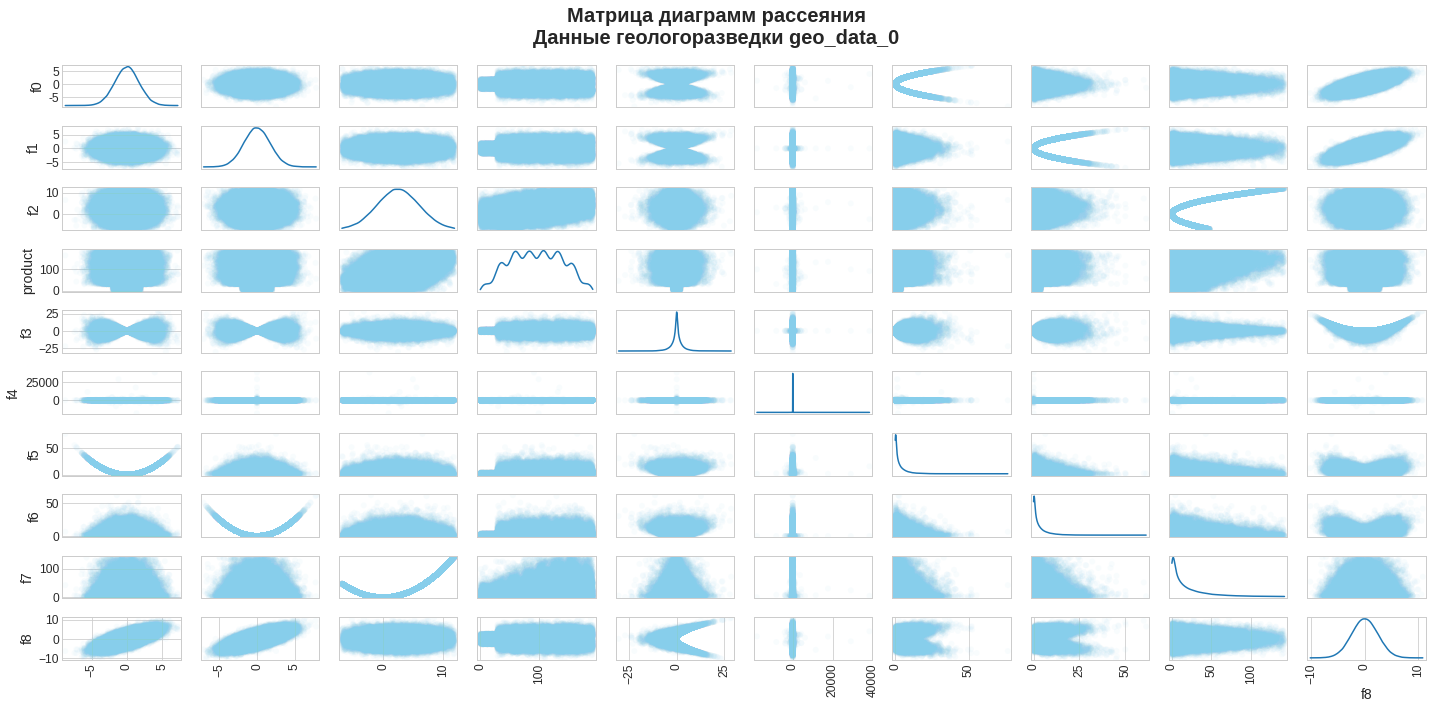

In [41]:
columns_to_plot = geo_data_0.columns[geo_data_0.columns != 'id']
axes = pd.plotting.scatter_matrix(
    geo_data_0[columns_to_plot],
    figsize=(20, 10),
    marker='o',
    c='skyblue',
    alpha=0.05,
    diagonal='kde'
)

for i in range(len(columns_to_plot)):
    for j in range(i):
        if i == j:
            continue
        axes[i, j].xaxis.label.set_visible(False)
        axes[j, i].yaxis.label.set_visible(False)
        
for ax in axes.flatten():
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    ax.tick_params(axis='both', labelsize=12)
    
plt.suptitle('Матрица диаграмм рассеяния\nДанные геологоразведки geo_data_0\n', fontsize=20, fontweight="bold")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [42]:
geo_data_1['f3'] = geo_data_1['f0'] * geo_data_1['f1']
geo_data_1['f4'] = geo_data_1['f0'] / geo_data_1['f1']
geo_data_1['f5'] = geo_data_1['f0'] * geo_data_1['f0']
geo_data_1['f6'] = geo_data_1['f1'] * geo_data_1['f1']
geo_data_1['f7'] = geo_data_1['f2'] * geo_data_1['f2']
geo_data_1['f8'] = geo_data_1['f0'] + geo_data_1['f1']

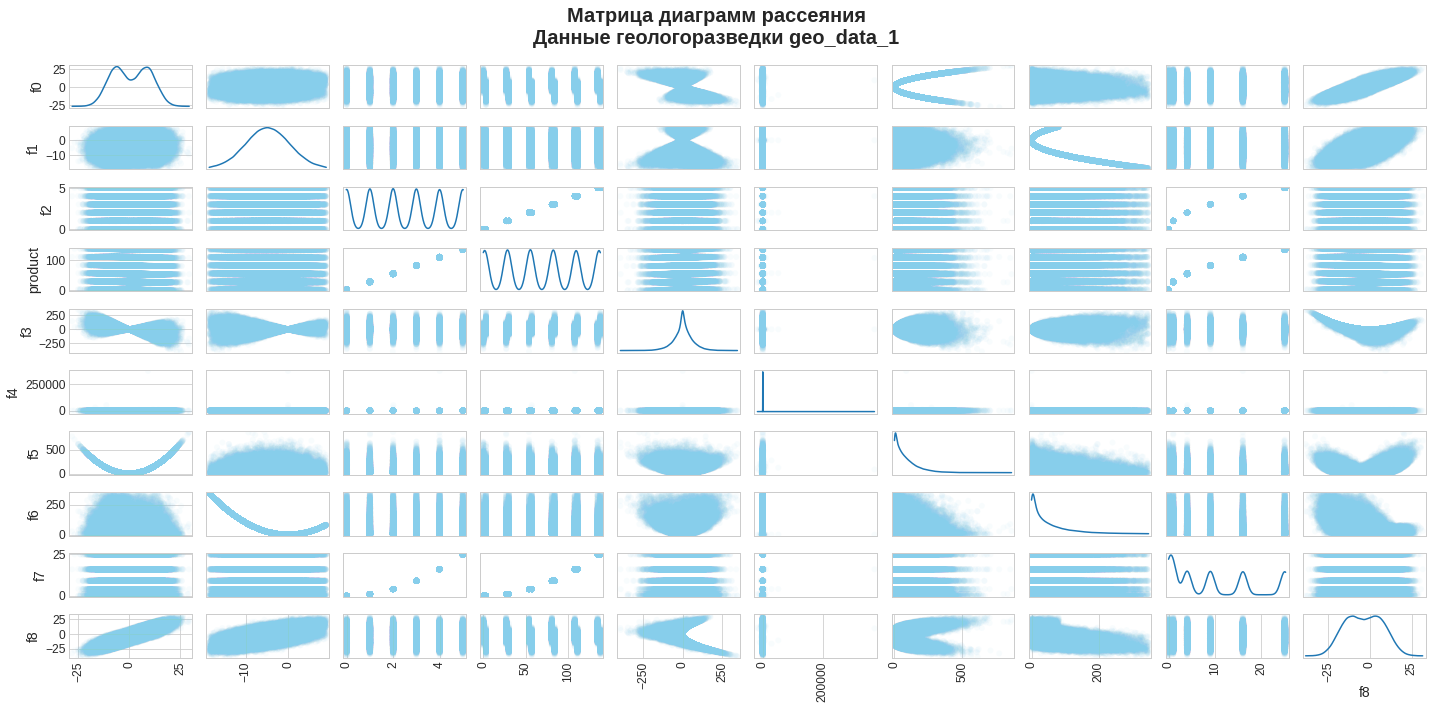

In [43]:
columns_to_plot = geo_data_1.columns[geo_data_1.columns != 'id']
axes = pd.plotting.scatter_matrix(
    geo_data_1[columns_to_plot],
    figsize=(20, 10),
    marker='o',
    c='skyblue',
    alpha=0.05,
    diagonal='kde'
)

for i in range(len(columns_to_plot)):
    for j in range(i):
        if i == j:
            continue
        axes[i, j].xaxis.label.set_visible(False)
        axes[j, i].yaxis.label.set_visible(False)

for ax in axes.flatten():
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    ax.tick_params(axis='both', labelsize=12)
    
plt.suptitle('Матрица диаграмм рассеяния\nДанные геологоразведки geo_data_1\n', fontsize=20, fontweight="bold")
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

In [44]:
geo_data_2['f3'] = geo_data_2['f0'] * geo_data_2['f1']
geo_data_2['f4'] = geo_data_2['f0'] / geo_data_2['f1']
geo_data_2['f5'] = geo_data_2['f0'] * geo_data_2['f0']
geo_data_2['f6'] = geo_data_2['f1'] * geo_data_2['f1']
geo_data_2['f7'] = geo_data_2['f2'] * geo_data_2['f2']
geo_data_2['f8'] = geo_data_2['f0'] + geo_data_2['f1']

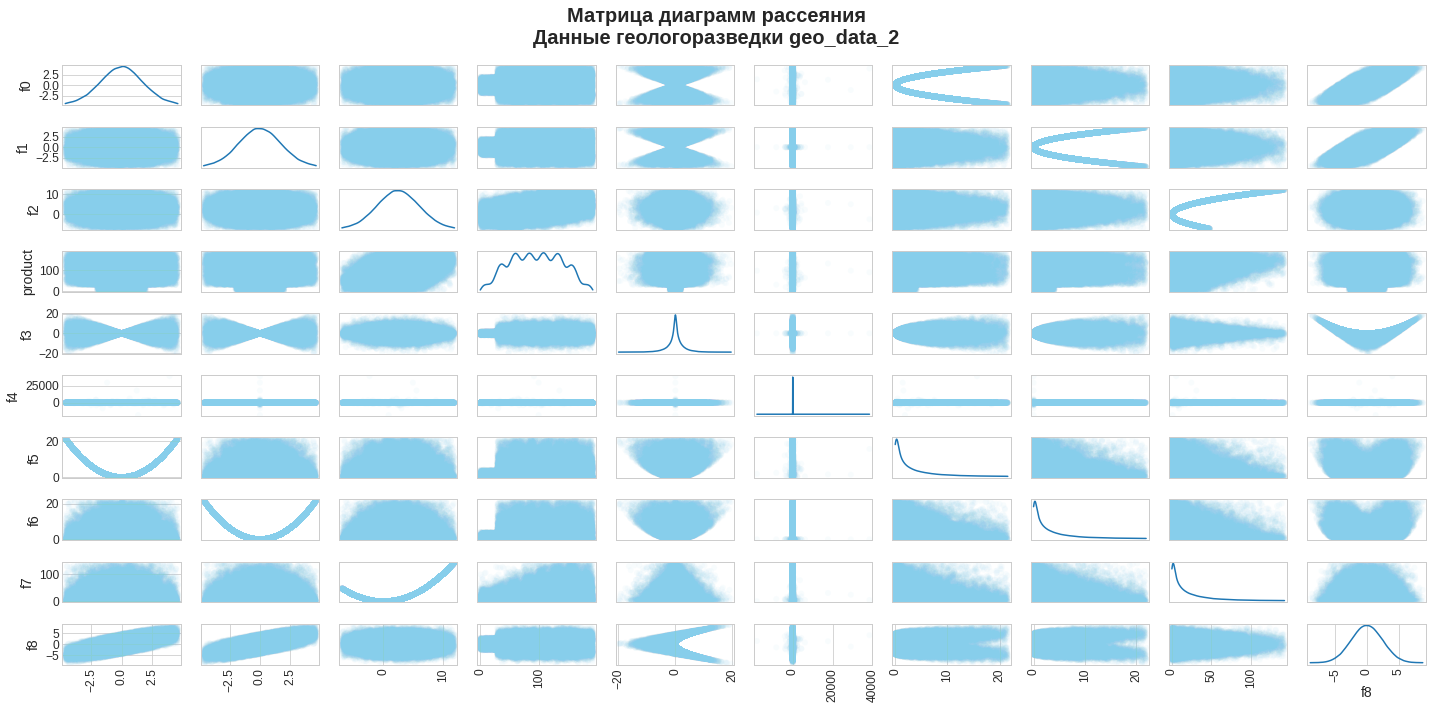

In [45]:
columns_to_plot = geo_data_2.columns[geo_data_2.columns != 'id']
axes = pd.plotting.scatter_matrix(
    geo_data_2[columns_to_plot],
    figsize=(20, 10),
    marker='o',
    c='skyblue',
    alpha=0.05,
    diagonal='kde'
)

for i in range(len(columns_to_plot)):
    for j in range(i):

        if i == j:
            continue
        axes[i, j].xaxis.label.set_visible(False)
        axes[j, i].yaxis.label.set_visible(False)

for ax in axes.flatten():
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    ax.tick_params(axis='both', labelsize=12)
    
plt.suptitle('Матрица диаграмм рассеяния\nДанные геологоразведки geo_data_2\n', fontsize=20, fontweight="bold")
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

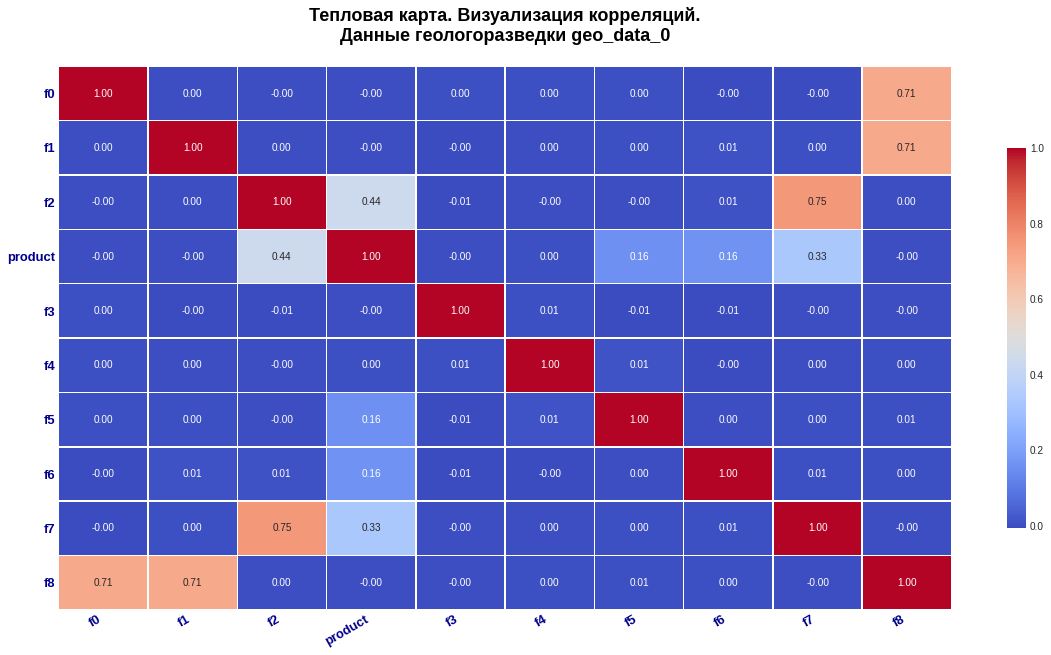

In [46]:
selected_columns = geo_data_0.columns[geo_data_0.columns != 'id']

plt.figure(figsize=(20, 10))

colormap = sns.color_palette("coolwarm", as_cmap=True)

chart = sns.heatmap(
    geo_data_0[selected_columns].corr(),
    annot=True,
    fmt=".2f",
    cmap=colormap,
    linewidths=.5,
    linecolor='white',
    cbar_kws={"shrink": .7}
)

plt.title('Тепловая карта. Визуализация корреляций.\nДанные геологоразведки geo_data_0\n', fontsize=18, fontweight="bold", color='black')

chart.set_xticklabels(selected_columns, rotation=30, ha='right', fontsize=13, fontweight="bold", color='darkblue')
chart.set_yticklabels(selected_columns, rotation=0, ha='right', fontsize=13, fontweight="bold", color='darkblue')

plt.show()

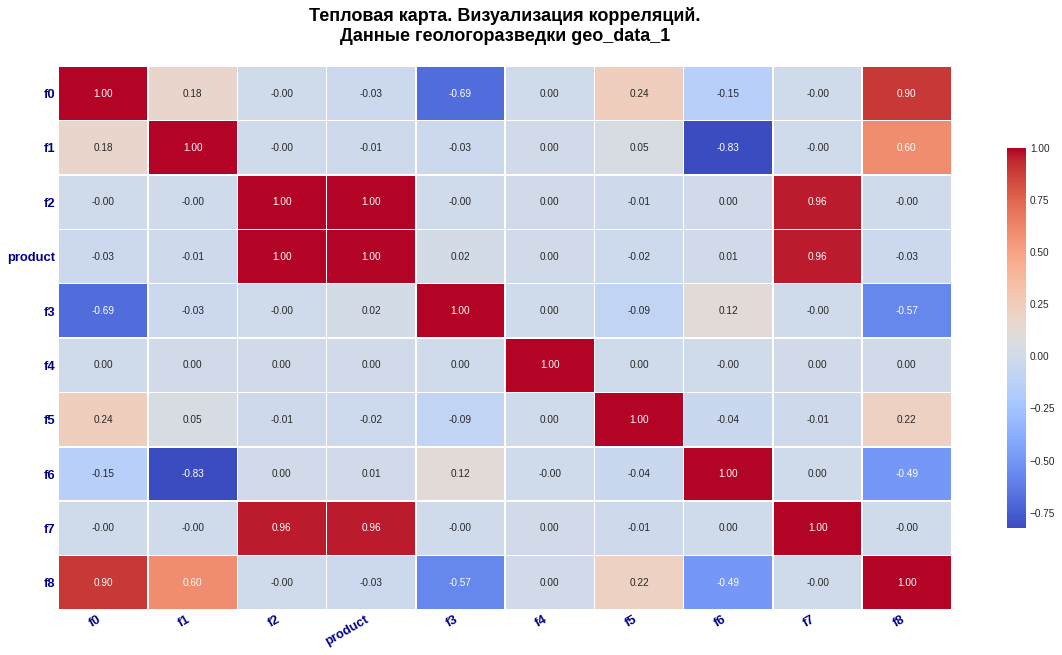

In [47]:
selected_columns = geo_data_1.columns[geo_data_1.columns != 'id']

plt.figure(figsize=(20, 10))

colormap = sns.color_palette("coolwarm", as_cmap=True)

chart = sns.heatmap(
    geo_data_1[selected_columns].corr(),
    annot=True,
    fmt=".2f",
    cmap=colormap,
    linewidths=.5,
    linecolor='white',
    cbar_kws={"shrink": .7}
)

plt.title('Тепловая карта. Визуализация корреляций.\nДанные геологоразведки geo_data_1\n', fontsize=18, fontweight="bold", color='black')

chart.set_xticklabels(selected_columns, rotation=30, ha='right', fontsize=13, fontweight="bold", color='darkblue')
chart.set_yticklabels(selected_columns, rotation=0, ha='right', fontsize=13, fontweight="bold", color='darkblue')

plt.show()

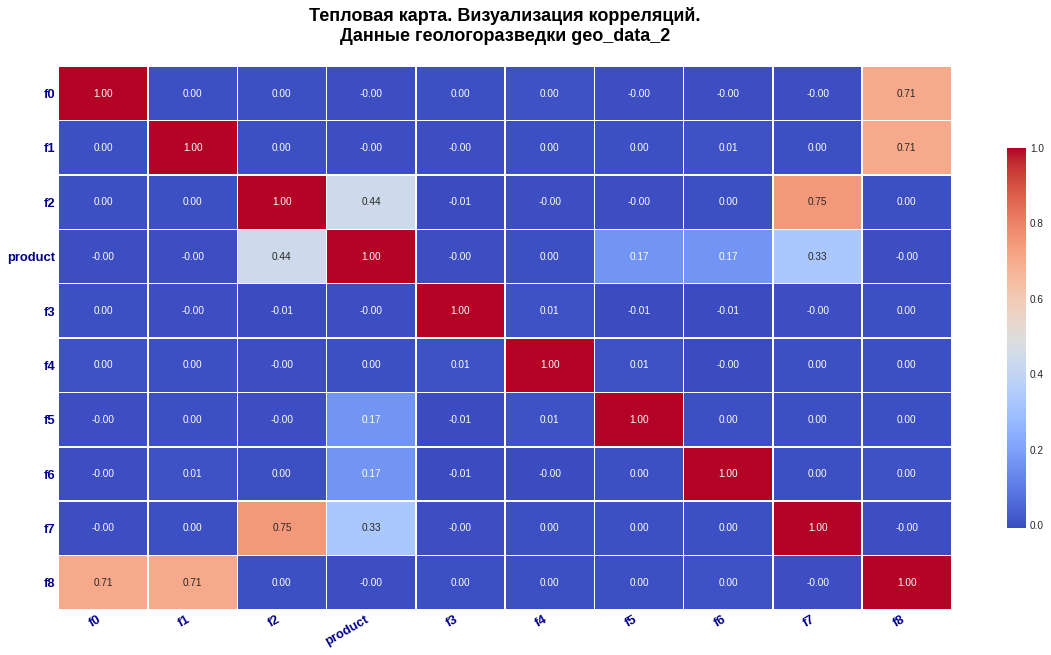

In [48]:
selected_columns = geo_data_2.columns[geo_data_2.columns != 'id']

plt.figure(figsize=(20, 10))

colormap = sns.color_palette("coolwarm", as_cmap=True)

chart = sns.heatmap(
    geo_data_2[selected_columns].corr(),
    annot=True,
    fmt=".2f",
    cmap=colormap,
    linewidths=.5,
    linecolor='white',
    cbar_kws={"shrink": .7}
)

plt.title('Тепловая карта. Визуализация корреляций.\nДанные геологоразведки geo_data_2\n', fontsize=18, fontweight="bold", color='black')

chart.set_xticklabels(selected_columns, rotation=30, ha='right', fontsize=13, fontweight="bold", color='darkblue')
chart.set_yticklabels(selected_columns, rotation=0, ha='right', fontsize=13, fontweight="bold", color='darkblue')

plt.show()

На этом этапе исследования были созданы новые признаки. Их визуализация проведена с помощью диаграмм рассеяния и тепловой карты для анализа корреляций. Было замечено, что некоторые из новых признаков имеют хорошую корреляцию. Ожидается, что объединение всех признаков, включая добавленные, позволит создать модель с более высоким качеством.

## Шаг 2. Обучение и проверка модели

In [49]:
data_fact = {'test':{},'pred':{}}

def education(data, columns_education, data_name, name):

    RANDOM_STATE = 42

    X_train, X_test, y_train, y_test = train_test_split(
        data[columns_education],
        data['product'],
        test_size = 0.25,
        random_state = RANDOM_STATE)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model_lr = LinearRegression()
    model_lr.fit(X_train_scaled, y_train)

    y_pred = model_lr.predict(X_test_scaled)

    rmse = mean_squared_error(y_test, y_pred, squared = False)
    
    np_array = np.array(y_pred)
    y_pred = pd.Series(np_array, index = y_test.index)
    
    data_fact['test'][name] = y_test
    data_fact['pred'][name] = y_pred

    print('\u001b[38;5;19m','Средний запас предсказанного сырья', data_name, round(y_pred.mean(), 2), 'тысяч баррелей','\u001b[0m')
    print('\u001b[38;5;19m','RMSE LinearRegression = ', round(rmse, 2), '\u001b[0m')
    return 

In [50]:
data = geo_data_0
columns_education = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8']
data_name = 'в 1-ом регионе по данным geo_data_0 ='
name = 'geo_data_0'

In [51]:
education(data, columns_education, data_name, name)

 Средний запас предсказанного сырья в 1-ом регионе по данным geo_data_0 = 95.0 тысяч баррелей 
 RMSE LinearRegression =  39.05 


In [52]:
data = geo_data_1
columns_education = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8']
data_name = 'во 2-ом регионе по данным geo_data_1 ='
name = 'geo_data_1'

In [53]:
education(data, columns_education, data_name,  name)

 Средний запас предсказанного сырья во 2-ом регионе по данным geo_data_1 = 68.77 тысяч баррелей 
 RMSE LinearRegression =  0.89 


In [54]:
data = geo_data_2
columns_education = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8']
data_name = 'в 3-ем регионе по данным geo_data_2 ='
name = 'geo_data_2'

In [55]:
education(data, columns_education, data_name, name)

 Средний запас предсказанного сырья в 3-ем регионе по данным geo_data_2 = 94.98 тысяч баррелей 
 RMSE LinearRegression =  38.68 


Обучение и проверка модели линейной регрессии прошли успешно. После приведения признаков к общему масштабу для данных каждого региона выяснилось, что максимальный средний запас предсказанного сырья находится в третьем регионе и составляет примерно 94.98 тысячи баррелей. В данных второго региона ошибка (RMSE) стремится к нулю, что говорит о сильной корреляции одного из признаков с целевой переменной.

## Шаг 3. Подготовка к расчёту прибыли

In [56]:
col_points = 500
col_auto = 200
budget = 10_000_000_000
income = 450_000
probability = 2.5
volume = budget / income / col_auto

column_dtypes = {
    'Исследуемое количество точек при бурении': int,
    'Отобранное количество с помощью машинного обучения': int,
    'Бюджет на разработку скважин в регионе,₽': int,
    'Доход с одного барреля сырья,₽': int,
    'Доля вероятности убытков,%': float,
    'Объём сырья для безубыточной разработки новой скважины,тысяч баррелей': float
}

data = {
    'Исследуемое количество точек при бурении': [col_points],
    'Отобранное количество с помощью машинного обучения': [col_auto],
    'Бюджет на разработку скважин в регионе,₽': [budget],
    'Доход с одного барреля сырья,₽': [income],
    'Доля вероятности убытков,%': [probability],
    'Объём сырья для безубыточной разработки новой скважины,тысяч баррелей': [volume]
}

df = pd.DataFrame(data)

for col_name, col_type in column_dtypes.items():
    df[col_name] = df[col_name].astype(col_type)

display(df.style.background_gradient(cmap='Blues', axis=0))

,Исследуемое количество точек при бурении,Отобранное количество с помощью машинного обучения,"Бюджет на разработку скважин в регионе,₽","Доход с одного барреля сырья,₽","Доля вероятности убытков,%","Объём сырья для безубыточной разработки новой скважины,тысяч баррелей"
0,500,200,10000000000,450000,2.500000,111.111111


In [57]:
print('\u001b[38;5;19m','Объём сырья для безубыточной разработки новой скважины: ', round(volume, 2), 'тысяч баррелей','\u001b[0m')

 Объём сырья для безубыточной разработки новой скважины:  111.11 тысяч баррелей 


In [58]:
print('\u001b[38;5;19m','Средний объем запасов скважины в 1-ом регионе по данным geo_data_0:  ', round(geo_data_0['product'].mean(), 2), 'тысяч баррелей','\u001b[0m')    
print('\u001b[38;5;19m','Средний объем запасов скважины во 2-ом регионе по данным geo_data_1:  ', round(geo_data_1['product'].mean(), 2), 'тысяч баррелей','\u001b[0m')
print('\u001b[38;5;19m','Средний объем запасов скважины в 3-ем регионе по данным geo_data_2:  ', round(geo_data_2['product'].mean(), 2), 'тысяч баррелей','\u001b[0m')

 Средний объем запасов скважины в 1-ом регионе по данным geo_data_0:   95.02 тысяч баррелей 
 Средний объем запасов скважины во 2-ом регионе по данным geo_data_1:   68.81 тысяч баррелей 
 Средний объем запасов скважины в 3-ем регионе по данным geo_data_2:   94.78 тысяч баррелей 


Чтобы новая скважина была разработана без убытков, необходимо добыть 111.11 тысяч баррелей сырья. Однако средний объём запасов скважин во всех регионах ниже этого показателя.

Что касается второго региона, наша модель точно предсказывает запасы скважин, несмотря на то, что средние запасы здесь почти в 1,5 раза меньше необходимого уровня и составляют 68.81 тысяч баррелей.

## Шаг 4. Расчёт прибыли и рисков 

In [59]:
def profit(target, predictions):
    sorted_indices = predictions.sort_values(ascending=False).index
    sorted_target = target[sorted_indices][:col_auto]
    sum_barrels = sorted_target.sum()
    return (sum_barrels * income) - budget

print('\u001b[38;5;19m', 
      f"Прибыль по выбранным скважинам в 1-ом регионе по данным geo_data_0:  {round(profit(data_fact['test']['geo_data_0'], data_fact['pred']['geo_data_0'])):,} рублей", 
      '\u001b[0m')

print('\u001b[38;5;19m', 
      f"Прибыль по выбранным скважинам во 2-ом регионе по данным geo_data_1:  {round(profit(data_fact['test']['geo_data_1'], data_fact['pred']['geo_data_1'])):,} рублей", 
      '\u001b[0m')

print('\u001b[38;5;19m', 
      f"Прибыль по выбранным скважинам в 3-ем регионе по данным geo_data_2:  {round(profit(data_fact['test']['geo_data_2'], data_fact['pred']['geo_data_2'])):,} рублей", 
      '\u001b[0m')

 Прибыль по выбранным скважинам в 1-ом регионе по данным geo_data_0:  3,011,592,856 рублей 
 Прибыль по выбранным скважинам во 2-ом регионе по данным geo_data_1:  2,415,086,697 рублей 
 Прибыль по выбранным скважинам в 3-ем регионе по данным geo_data_2:  2,964,860,833 рублей 


In [60]:
def bootstrap(target, predictions, n_iterations=1000, sample_size=500, random_seed=12345):

    state = np.random.RandomState(random_seed)
    profit_sample = []

    for _ in range(n_iterations):
        sample_target = target.sample(n=sample_size, replace=True, random_state=state)
        sample_predictions = predictions[sample_target.index]
        profit_sample.append(profit(sample_target, sample_predictions))

    return pd.Series(profit_sample)

In [61]:
raspred_0 = bootstrap(data_fact['test']['geo_data_0'], data_fact['pred']['geo_data_0'])
raspred_1 = bootstrap(data_fact['test']['geo_data_1'], data_fact['pred']['geo_data_1'])
raspred_2 = bootstrap(data_fact['test']['geo_data_2'], data_fact['pred']['geo_data_2'])

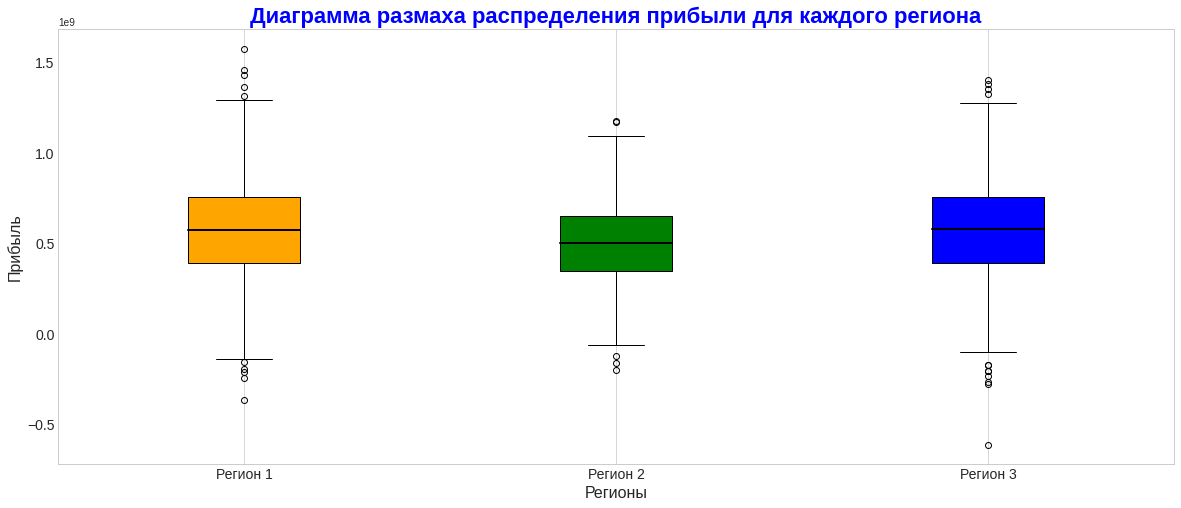

In [62]:
fig, ax = plt.subplots(figsize=(20, 8))

box_plot_data = [raspred_0, raspred_1, raspred_2]

colors = ['orange', 'green', 'blue']
box = plt.boxplot(
    box_plot_data, 
    patch_artist=True, 
    boxprops=dict(facecolor=colors[0], color='black'), 
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    labels=['Регион 1', 'Регион 2', 'Регион 3']
)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
plt.title('Диаграмма размаха распределения прибыли для каждого региона', fontsize=22, fontweight='bold', color='blue')
plt.ylabel('Прибыль', fontsize=16)
plt.xlabel('Регионы', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [63]:
print('\u001b[38;5;19m', 
      f"Средняя прибыль в 1-ом регионе по данным geo_data_0:  {int(round(raspred_0.mean(), 0)):,} рублей", 
      '\u001b[0m')

print('\u001b[38;5;19m', 
      f"95%-й доверительный интервал в 1-ом регионе по данным geo_data_0: от {int(round(raspred_0.quantile(0.025), 0)):,} до {int(round(raspred_0.quantile(0.975), 0)):,} рублей", 
      '\u001b[0m')

print('\u001b[38;5;19m', 
      f"Риск убытков в 1-ом регионе по данным geo_data_0:  {round(raspred_0.apply(lambda x: x < 0).sum() / len(raspred_0) * 100, 3)}%", 
      '\u001b[0m')

 Средняя прибыль в 1-ом регионе по данным geo_data_0:  572,744,043 рублей 
 95%-й доверительный интервал в 1-ом регионе по данным geo_data_0: от 47,530,873 до 1,096,624,395 рублей 
 Риск убытков в 1-ом регионе по данным geo_data_0:  1.6% 


In [64]:
print('\u001b[38;5;19m', 
      f"Средняя прибыль во 2-ом регионе по данным geo_data_1:  {int(round(raspred_1.mean(), 0)):,} рублей", 
      '\u001b[0m')

print('\u001b[38;5;19m', 
      f"95%-й доверительный интервал во 2-ом регионе по данным geo_data_1: от {int(round(raspred_1.quantile(0.025), 0)):,} до {int(round(raspred_1.quantile(0.975), 0)):,} рублей", 
      '\u001b[0m')

print('\u001b[38;5;19m', 
      f"Риск убытков во 2-ом регионе по данным geo_data_1:  {round(raspred_1.apply(lambda x: x < 0).sum() / len(raspred_1) * 100, 3)}%", 
      '\u001b[0m')

 Средняя прибыль во 2-ом регионе по данным geo_data_1:  502,263,563 рублей 
 95%-й доверительный интервал во 2-ом регионе по данным geo_data_1: от 103,848,192 до 920,077,942 рублей 
 Риск убытков во 2-ом регионе по данным geo_data_1:  0.4% 


In [65]:
print('\u001b[38;5;19m', 
      f"Средняя прибыль в 3-ем регионе по данным geo_data_2:  {int(round(raspred_2.mean(), 0)):,} рублей", 
      '\u001b[0m')

print('\u001b[38;5;19m', 
      f"95%-й доверительный интервал в 3-ем регионе по данным geo_data_2: от {int(round(raspred_2.quantile(0.025), 0)):,} до {int(round(raspred_2.quantile(0.975), 0)):,} рублей", 
      '\u001b[0m')

print('\u001b[38;5;19m', 
      f"Риск убытков в 3-ем регионе по данным geo_data_2:  {round(raspred_2.apply(lambda x: x < 0).sum() / len(raspred_2) * 100, 3)}%", 
      '\u001b[0m')

 Средняя прибыль в 3-ем регионе по данным geo_data_2:  572,944,139 рублей 
 95%-й доверительный интервал в 3-ем регионе по данным geo_data_2: от -1,890,907 до 1,086,652,584 рублей 
 Риск убытков в 3-ем регионе по данным geo_data_2:  2.7% 


На основании анализа трех регионов были получены следующие результаты:  

1. **1-ый регион (geo_data_0):**  
   - Средняя прибыль составила **572,744,043 рублей**, что является самым высоким показателем среди всех регионов.  
   - 95%-й доверительный интервал: от **47,530,873** до **1,096,624,395 рублей**, что указывает на значительную неопределенность в оценках.  
   - Риск убытков в регионе составляет **1.6%**, что является приемлемым уровнем риска.  

2. **2-ой регион (geo_data_1):**  
   - Средняя прибыль составила **502,263,563 рублей**, что немного ниже, чем в 1-ом регионе.  
   - 95%-й доверительный интервал: от **103,848,192** до **920,077,942 рублей**, при этом интервал уже, чем в 1-ом регионе, что свидетельствует о более устойчивых результатах.  
   - Риск убытков в регионе составляет **0.4%**, что является самым низким показателем среди всех регионов.  

3. **3-ий регион (geo_data_2):**  
   - Средняя прибыль составила **572,944,139 рублей**, что сопоставимо с прибылью в 1-ом регионе.  
   - 95%-й доверительный интервал: от **-1,890,907** до **1,086,652,584 рублей**, что включает отрицательное значение, указывая на возможность убытков.    - Риск убытков в регионе самый высокий — **2.7%**.  

**Возможные рекомендации:**

1. **1-ый регион (geo_data_0)**  
   Высокая средняя прибыль и умеренный риск убытков делают этот регион привлекательным для инвестиций. Однако высокая вариативность результатов требует дополнительных исследований для снижения неопределенности.  

2. **2-ой регион (geo_data_1)**  
   Этот регион демонстрирует наиболее устойчивые результаты с минимальным риском убытков. Несмотря на немного меньшую среднюю прибыль по сравнению с 1-ым регионом, он может быть предпочтительным для вложений из-за стабильности.  

3. **3-ий регион (geo_data_2)**  
   Несмотря на высокую среднюю прибыль, риск убытков в этом регионе остается высоким, а 95%-й доверительный интервал включает отрицательные значения. Этот регион может быть интересен, но требует значительного анализа рисков и возможных причин нестабильности.  

## Шаг 5. Общий вывод

Изучили и обработали данные по пробам нефти из трёх регионов, проведя подробный анализ:  

1. **Обработка данных:**  
   - Пропуски и дубликаты отсутствуют.  
   - Обнаружены парные дубликаты по столбцу `id`, которые различались по остальным параметрам. Решено разделить данные, добавив к идентификаторам `_1` и `_2`.  

2. **Работа с выбросами:**  
   - Построены диаграммы размаха, на которых выявлены выбросы за пределами квартилей. Создана функция для их удаления, предварительно рассчитан процент удаляемых данных (не превышал 0.8%).  
   - После очистки данных визуализация подтвердила успешное удаление выбросов.  

3. **Анализ признаков:**  
   - Диаграммы рассеяния и тепловые карты показали, что в 1-ом регионе признак `f2` имеет сильную корреляцию с целевым признаком, а остальные признаки обладают слабой зависимостью.  
   - Для улучшения качества моделей были созданы и добавлены новые признаки. Проведён повторный анализ, который подтвердил повышение значимости данных.  

4. **Обучение модели:**  
   - Данные разбиты на обучающую и валидационную выборки (75:25), признаки масштабированы.  
   - Построена модель линейной регрессии, которая была обучена и протестирована. Средний объём предсказанного сырья и RMSE для каждого региона сохранены для дальнейшего анализа.  

5. **Анализ достаточности запасов и прибыли:**  
   - Рассчитан необходимый объём сырья для безубыточной разработки новой скважины и сравнен со средними запасами сырья в каждом регионе.  
   - Написана функция для расчёта прибыли на основе предсказаний модели. Выбраны скважины с максимальными значениями прогнозов.  

6. **Оценка рисков:**  
   - Построены диаграммы размаха прибыли для каждого региона, которые показали, что 3-ий регион имеет наибольшую прибыль, однако риск убытков в нём выше.  


**Предложение по региону:**

Анализ данных показал:  

- **1-ый регион (geo_data_0):** высокая прибыль и низкий риск убытков (1.6%), но значительная неопределённость результатов.  
- **2-ой регион (geo_data_1):** минимальный риск убытков (0.4%) и стабильность, что делает его привлекательным для разработки.  
- **3-ий регион (geo_data_2):** самая высокая прибыль, но риск убытков (2.7%) выше нормы.  

Для минимизации рисков и обеспечения стабильной прибыли рекомендуется выбрать **2-ой регион (geo_data_1)** для разработки скважин.  

Если основной целью является максимизация прибыли, а повышенный риск является приемлемым, можно рассмотреть **3-ий регион (geo_data_2)** с предварительной оценкой факторов риска.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован